# Exploratory Data Analysis (EDA)
The objective of this notebook is to perform an exploratory data analysis over the dataset provided by the institutions leading the Telangana Classification Challenge in order to better understand its characteristics.  

## Libraries
The first step is to import the required Python libraries.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [3]:
df=pd.read_csv("../data/Train.csv")

# Data Overview

In [4]:
#Dataset size
print("The dataset has",df.shape[0],"rows and",df.shape[1],"attributes")
#Target feature
print("The target feature is stored in the column \"category\" and it has the next values:",df.category.unique())

The dataset has 8775 rows and 20 attributes
The target feature is stored in the column "category" and it has the next values: ['Healthy' 'Diseased' 'Pests' 'Stressed']


In [5]:
# Taking a look
df.head()

,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry
0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,25-11-2023,14-04-2024,97,54,Pea,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,POLYGON ((78.18143246076087 17.978884603571068...
1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,13-11-2023,26-04-2024,82,58,Pea,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,POLYGON ((78.17545177547453 17.981074445477304...
2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,19-12-2023,28-04-2024,92,91,Pea,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,POLYGON ((78.16914224770792 17.976212849967755...
3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,11-02-2023,04-11-2024,91,52,Pea,Lentil,Transplanting,Flood,Canal,5,92,16,Rabi,POLYGON ((78.16889103841902 17.974608186550842...
4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,12-12-2023,19-05-2024,94,55,Pea,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,POLYGON ((78.17264452998072 17.969251496349454...


In [6]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FarmID           8775 non-null   int64 
 1   category         8775 non-null   object
 2   Crop             8775 non-null   object
 3   State            8775 non-null   object
 4   District         8775 non-null   object
 5   Sub-District     8775 non-null   object
 6   SDate            8775 non-null   object
 7   HDate            8775 non-null   object
 8   CropCoveredArea  8775 non-null   int64 
 9   CHeight          8775 non-null   int64 
 10  CNext            8775 non-null   object
 11  CLast            8775 non-null   object
 12  CTransp          8775 non-null   object
 13  IrriType         8775 non-null   object
 14  IrriSource       8775 non-null   object
 15  IrriCount        8775 non-null   int64 
 16  WaterCov         8775 non-null   int64 
 17  ExpYield         8775 non-null   

**Observations**
From this quick overview it is possible to observe that:
1. There are not missing values in the provided dataset. 
2. There are 19 attributes. Some of them such as the Farm ID may not be related to the studied phenomenon, which motivates a deeper analysis of each variable.
3. The target feature has 4 possible values to predict which means a multiclass classification algorithm should be developed.

# Univariate Analysis

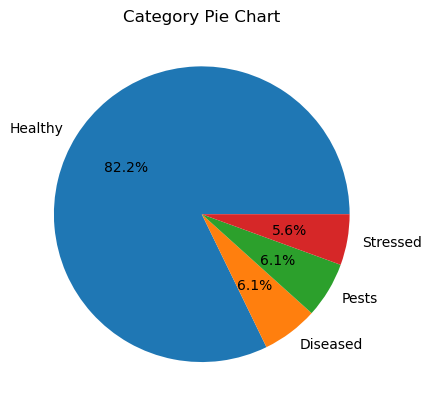

In [36]:
# Target Variable (Category)
fig1=plt.figure()
ax1=fig1.add_subplot()
ax1.pie(df.category.value_counts().values,labels=list(df.category.value_counts().index),autopct='%1.1f%%');
ax1.set_title("Category Pie Chart");

In [30]:
list(df.category.value_counts().index)

['Healthy', 'Diseased', 'Pests', 'Stressed']

In [31]:
#Numerical features description:
df.describe()

,FarmID,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield
count,8.775000e+03,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000
mean,1.252339e+06,76.553504,87.707806,3.550541,57.150199,15.541197
std,2.447332e+05,15.002601,49.307300,1.391602,22.330291,5.933997
min,2.780000e+02,40.000000,20.000000,1.000000,20.000000,5.000000
25%,1.314020e+06,65.000000,57.000000,2.000000,42.000000,11.000000
50%,1.324434e+06,78.000000,76.000000,4.000000,51.000000,15.000000
75%,1.329228e+06,89.000000,100.000000,5.000000,82.000000,20.000000
max,1.332157e+06,100.000000,250.000000,6.000000,100.000000,30.000000


# Questions
1. How to evaluate the independence of the dataset points?
2. Qué hacer si estoy seguro que no hay una relación física con el fenómeno, más no estoy seguro de que así sea con matemáticamente?